# Introduction:
This module focuses on image processing using threshold and edge detection (Sobel and Canny edge detectors) to find boundaries. Edge detection can be applied to image segmentation, object detection, image feature extraction, machine learning, etc.

Besides going over how to apply edge detection techniques to images, the module will also demonstrate several things, like reading and writing images. The following is the list that this module will present:
1.   Read files based on file names and format
2.   Read original images and write the resulting images
3.   Image processing: conversion of grayscale images
4.   Image processing: threshold
5.   Image processing: edge detectors (Sobel and Canny edge detectors)
6.   Display resulting images and compare resulting images with original images by making plots

The following is the list of modules that are utilized in this module:
1.   opencv-python (cv2)
2.   os
3.   matplotlib (pyplot)
4.   google.colab (drive)
5.   google.colab.patches (cv2_imshow)
6.   numpy

Regarding image processing and reading/displaying/writing images, this module utilizes functions in the OpenCV-python module (which is imported by calling cv2). The OpenCV is an open-source library that allows users to perform many image processing and computer vision algorithms. Here is the link to the OpenCV documentation and tutorials:
https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

To plot the resulting images, we use the Matplotlib module. In Python, users can use functions in the Matplotlib module to create static, animated, and interactive plots and figures. Here is the link to the Matplotlib.pyplot documentation and tutorials:
https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py


The NumPy module is useful when working with multidimensional arrays, such as creating arrays with a specific number (i.e., zero) or an empty array with a specific dimension. The NumPy also covers comprehensive mathematical tools and algorithms, including random number generators, linear algebra routines, and Fourier transform. Here we use the Numpy module to display arrays. The following link can be used to access the NumPy documentation and tutorials:
https://numpy.org/doc/stable/

The images used in this module and assignment are from the LIVE Image Quality Assessment Database (https://live.ece.utexas.edu/research/quality/subjective.htm).
This database is made for image quality assessment. Therefore, in the database, besides original high-quality natural images (which are called reference images), the reference images are processed to simulate relatively low-quality images using Gaussian noise, white noise, and compression. Note that this database also includes the image quality value of each image using differential mean opinion score (DMOS). As a side note, the mean opinion score (MOS), an image quality rating, is assessed by human raters using a particular scale (such as a 1 to 5 scale where 1 stands for poor quality and 5 stands for excellent quality).
DMOS is the difference in MOS between the reference image and the corresponding post-processing image. Therefore, when an image has higher quality, DMOS is lower.


You can download a portion of the database from [here](https://drive.google.com/drive/folders/1xFt2GMGjUNEBORXoIhIOTFMe3RN3Kclf?usp=share_link).
Since we don't need all images for this module and the associated assignment, we don't have to download all images to save space and time.



### Import required modules

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Prepare data (images)

First of all, we want to load two images, which are "buildings.bmp" and "img7.bmp" from the "refimgs" folder and "gblur" folder, respectively. Note that "img7.bmp" is a blurry version of "buildings.bmp".

To do so, we need to locate where the images are by passing the file paths. Next, we search the images based on the filenames and format.

#### Setting filepaths for images

The database can be stored and worked remotely. Instead of working locally, we can store the database in Google Drive and load the database from Google Drive. This step requires mounting and connecting the (user's) Google Drive. Then, once the Google Drive is connected, the specific file paths can be obtained and passed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we want to load original images from "refimgs" and blurry images from "gblur".

In [ ]:
filepath1 = "/content/drive/MyDrive/LIVE/refimgs"
filepath2 = "/content/drive/MyDrive/LIVE/gblur"

#### Loading files (images) with the specfic format

We set up a function to find the specific images. Note that we can directly reference the path of the selected files. However, to learn how to use a function to find a file we want (which will be helpful when looking for multiple files), we have this extra step.

First, we create a list of filenames in the assigned folder using the *listdir()* function.

In [ ]:
filelist1 = os.listdir(filepath1)
filelist2 = os.listdir(filepath2)

Next, we look for files that end with "buildings.bmp" in the filelist1; "img7.bmp" in the filelist2. This step is completed by the *endswith()* function and list comprehension (a nice simple way to loop through all files).

In [ ]:
filename1 = [file for file in filelist1 if file.endswith('buildings.bmp')]
filename2 = [file for file in filelist2 if file.endswith('img7.bmp')]

Then, we create a variable to store the image we read in Python. This step is done with the *imread()* function. In addition, since we separate the file path and filename, we need to combine them with the *path.join()* function to locate and read the image. We pass an index 0 to filename1 and filename2 to extract only one filename from these two variables (they are both lists).

In [ ]:
img1 = cv2.imread(os.path.join(filepath1,filename1[0]))
img2 = cv2.imread(os.path.join(filepath2,filename2[0]))

The next step is to check input images. Note that checking points can reduce the likelihood of crashing the program, introducing errors, or ensuring input data make sense (to prevent garbage in, and garbage out).

To display images, we can use the *imshow()* function (if users do not work in Google Colab). For the *imshow()* function, the first argument is the name of the window (the window will automatically fit the size of the image), and the second argument is the image we want to display.

Sometimes we want to check images and do not want the window to be destroyed automatically. Therefore, we have the *waitKey(0)* function by passing the argument 0 to have the window wait till any key is pressed.

Here is the example (when we are not running codes in Google Colab):

In [ ]:
#Do not run the following lines when working in Colab because Colab doesn't support cv2.imshow().
#cv2.imshow("name of the window",img1)
#cv2.imshow("name of the window",img2)
#cv2.waitKey(0)

Since we use Google Colab for this module, we have to import the cv2_imshow to display images.

In [ ]:
from google.colab.patches import cv2_imshow

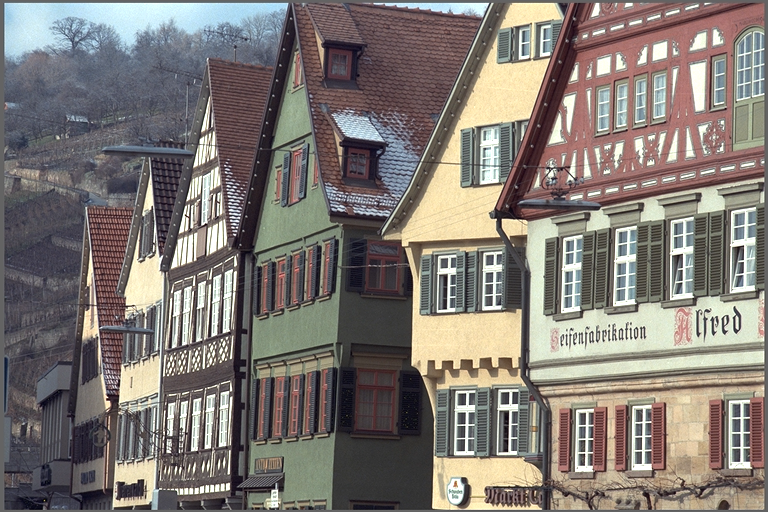

In [ ]:
cv2_imshow(img1)

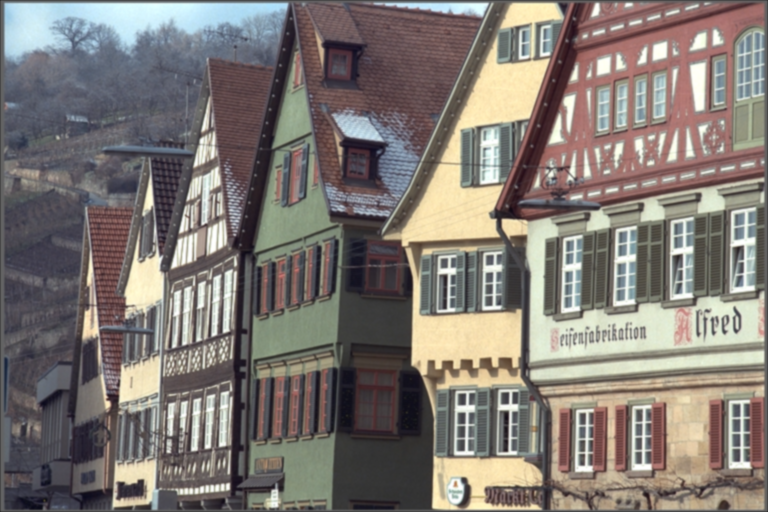

In [ ]:
cv2_imshow(img2)

Let's also check images by "printting out" images in arrays. Here is an illustration of the first image (img1).

In [ ]:
print(img1)

[[[ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]]

 [[ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 99  98 100]
  [ 99  99  99]
  [ 99  99  99]]

 [[ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 99  97 102]
  [ 99  99  99]
  [ 99  99  99]]

 ...

 [[ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 90  95  96]
  [ 99  99  99]
  [ 99  99  99]]

 [[ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]]

 [[ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 99  99  99]
  [ 99  99  99]
  [ 99  99  99]]]


Based on the array, we can see values like 90, 95, 96, 99, etc. What are these numbers? The numbers which are present are called pixel (intensity) values. In general, an image is composed of small blocks, and each of the small blocks is called a pixel. The number of pixels in an image depends on the height and width of the image (the number of pixels = height * width). The pixel value is the intensity or brightness the particular pixel has and presents in an image. For most images, the range of pixel values is from 0 (black) to 255 (white).

The other thing that we can see from the array is there are three open and closed brackets [[[image in the array]]] at the beginning and end. The number of brackets enclosing the array can indicate the dimensions of the array - which is 3-dimension in this case. The reason the image is a 3-D array is that the image has three channels, which are R, G, and B channels. The three channels make a color image.


Here we print out the *shape* attribute of the image array. Because the image is a color image, the shape is a tuple of (row (height), column (width), color (3))

In [ ]:
print(img1.shape)

(512, 768, 3)


#### Conversion of RGB images into grayscale images

Here we convert images into grayscale images since we need grayscale images to complete the following image processings (*i.e.,* the source image for threshold should be a grayscale image) in this module. The *cvtColor()* function does this process with the argument *cv2.COLOR_BGR2GRAY*.

In [ ]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

The following illustrates the images after the conversion.

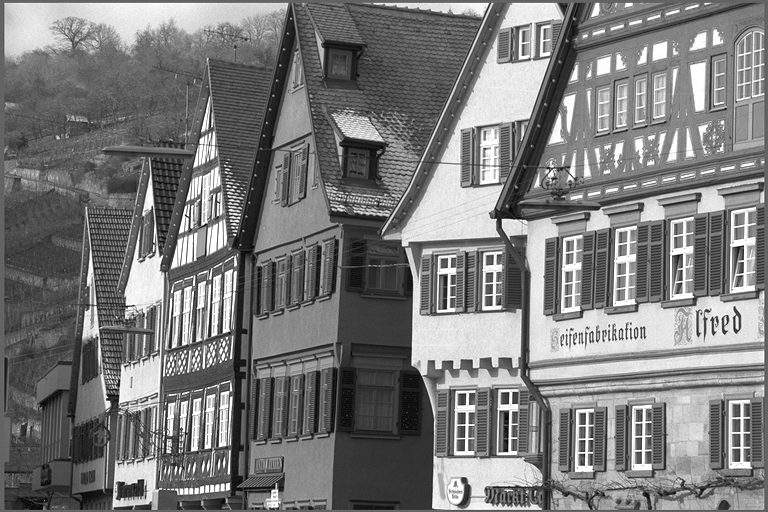

In [ ]:
cv2_imshow(img1)

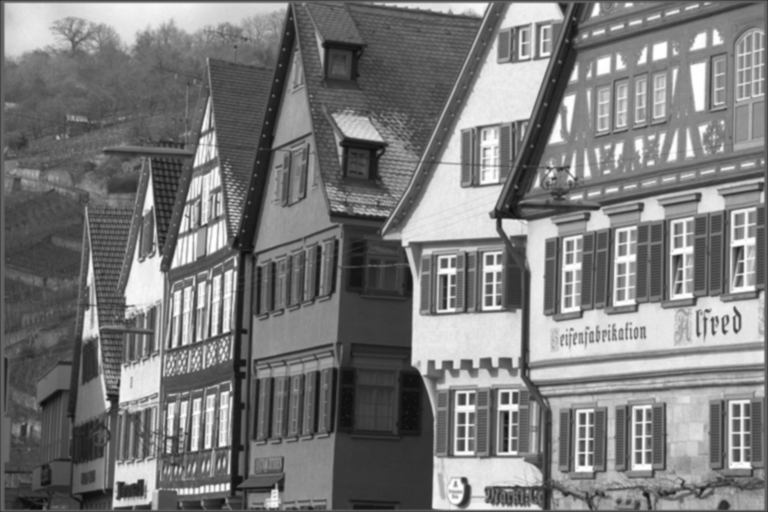

In [ ]:
cv2_imshow(img2)

Note that sometimes we want to avoid modifying or overwriting original images. Therefore, we can use the *copy()* method to make a copy file for any modifications or changes. This situation is not considered in this module.

### Image processing

The following sections cover applying the threshold function and edge detectors to images.

#### Image thresholding

The *threshold()* function is used to apply thresholds on images. In terms of the arguments in the *threshold()* function, the first argument is the source or input image. The second argument is the threshold value to classify the pixel values. Specifically, if the pixel value is smaller than the threshold, it is set to 0 or the value based on the chosen fourth argument. Otherwise, it is set to a maximum value. The third argument is the maximum value assigned to pixel with values over the threshold. Lastly, the fourth argument is to select the thresholding method. For the fourth argument, here we pick *cv2.THRESH_BINARY* to set pixel value to 0 if the pixel value is smaller than the threshold.

For the second argument, it is 127, which is the mean of the minimum pixel value of 0 and the maximum pixel value of 255.

In [ ]:
ret1, img1_thre = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
ret2, img2_thre = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)

The *threshold()* function returns two outputs. The first output is the threshold that is applied, and the second is the thresholded image. Keep in mind that the order of these two outputs can not be reversed.

Let's take a look at the images after thresholding.

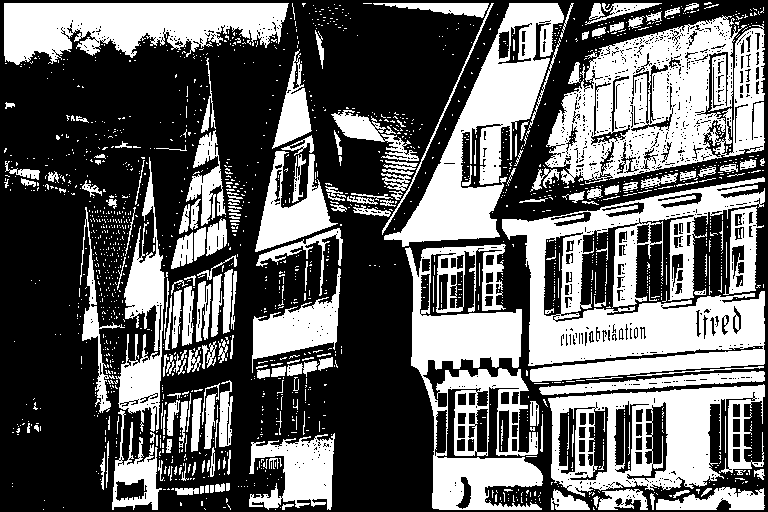

In [ ]:
cv2_imshow(img1_thre)

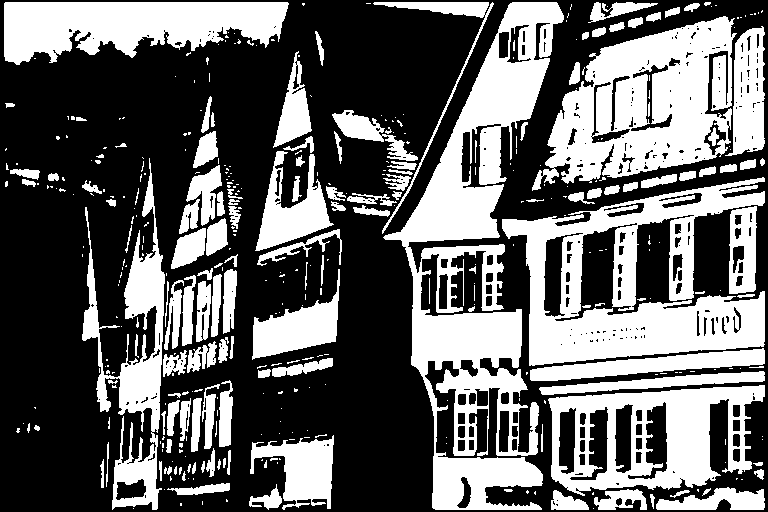

In [ ]:
cv2_imshow(img2_thre)

Based on the two resulting images, it is clear that the original image has more details than the blurry image after image thresholding.

#### Sobel edge detector

In general, edge detection is a mathematical method to find the boundaries of objects within images.
The following will illustrate how the Sobel edge detector works to images, and results caused by the Sobel edge detector.

Let's discuss the edges or boundaries of objects in terms of computer vision first. Edges always have a big difference or change in intensity compared to their neighborhood. One way to compute changes in intensity (or image gradient, which is changes in intensity in an image) is to take derivatives in intensity.

To do so, we apply the Sobel filters or associated kernel functions to calculate the approximation of the first derivative of an image. Specifically, we convolve an image with filters and then obtain the approximation (resulting image). We will show a simple example of how the convolution works in a minute.

There are two Sobel filters, and both of them are 3 x 3 arrays. One of the filters is for the x direction, which is shown using the *matrix()* function below:

In [ ]:
x_sobel = np.matrix([[-1,0,1],[-2,0,2],[-1,0,1]])
print(x_sobel)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


The Sobel filter in the x direction allows us to see any changes in the horizontal or the x direction. Assume we have a 3 x 3 image:

In [ ]:
fake_img = np.matrix([[150,150,150],[150,150,255],[150,255,255]])
print(fake_img)

[[150 150 150]
 [150 150 255]
 [150 255 255]]


Next, we convolve the 3 x 3 image with the Sobel filter (x direction) by selecting the center pixel and setting kernel size 3 (the portion of the image we use for the convolution), so we don't have to pad 0 for the first illustration (in Python, we don't have to pad images manually):

In [ ]:
conv_x = np.matrix([["150 x (-1)", "150 x 0", "150 x 1"],["150 x (-2)", "150 x 0", "255 x 2"],["150 x (-1)", "255 x 0", "255 x 1"]])
print(conv_x)

[['150 x (-1)' '150 x 0' '150 x 1']
 ['150 x (-2)' '150 x 0' '255 x 2']
 ['150 x (-1)' '255 x 0' '255 x 1']]


Next, we sum up the values from the above computation:
150 x (-1) + 150 x (0) + 150 x (1) + 150 x (-2) + 150 x 0 + 255 x 2 + 150 x (-1) + 255 x (0) + 255 x (1) = 315

After the convolution, this resulting value "315" is the new center value in the resulting matrix. This process is repeated for every pixel in the original image.

In [ ]:
after_filterd_x = np.matrix([["","",""],["",315,""],["","",""]])
print(after_filterd_x)

[['' '' '']
 ['' '315' '']
 ['' '' '']]


We can pad zero if there are no pixels to use for the convolution. For example, when computing the convolution for the most top left pixel (150), we pull "the 150" to align with the center of the kernel and pad some zero around. The demonstration is shown below:

In [ ]:
sub_fake_image = np.matrix([[0,0,0],[0,150,150],[0,150,150]])
print(sub_fake_image)

[[  0   0   0]
 [  0 150 150]
 [  0 150 150]]


Then we perform the convolution.

In [ ]:
conv_xx = np.matrix([["0 x (-1)", "0 x 0", "0 x 1"],["0x (-2)", "150 x 0", "150 x 2"],["0 x (-1)", "150 x 0", "150 x 1"]])
print(conv_xx)

[['0 x (-1)' '0 x 0' '0 x 1']
 ['0x (-2)' '150 x 0' '150 x 2']
 ['0 x (-1)' '150 x 0' '150 x 1']]


Similarly, we sum up all values (which is 450) and then put the value in the resulting matrix we showed earlier.

In [ ]:
after_filterd_xx = np.matrix([["450","",""],["",315,""],["","",""]])
print(after_filterd_xx)

[['450' '' '']
 ['' '315' '']
 ['' '' '']]


Once we complete the convolution using the x-direction filter. We perform the convolution on the original image with the filter for the y direction. The following is the filer for the y direction.

In [ ]:
y_sobel =np.matrix([[-1,-2,-1],[0,0,0],[1,2,1]])
print(y_sobel)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


After the convolution using the y-direction filter is done, we then compute the approximation by:

G = |the matrix computed using the x-direction filter| + |the matrix computed using the y-direction filter|

Note that different programming languages or modules/libraries might have different ways of computing the approximation.

Now let's check out how to apply the Sobel filters to images.

The *Sobel()* function in the cv2 module is used for the Sobel edge detection. There are four arguments required in the *Sobel()* function. The first argument is the input image. The second argument (*ddepth*) defines the precision of the output image, which we set to *cv2.CV_64F* (the numpy array dtype is float64). The third and fourth arguments are *dx* and *dy*. If only requiring to compute image gradient in the x-direction, then setting *dx=1* and *dy=0*, and vice versa. In this module, we want to apply kernel functions in both directions, and therefore we set *dx=1* and *dy=1*. The fifth argument is the *ksize*, which is a window size to apply the kernel functions over images. Here, we set *ksize=5*.

We don't have to specify the names of parameters/arguments in the function. However, for the sake of the demonstration, the name of each argument is shown in the function.

In [ ]:
img1_sobel = cv2.Sobel(src=img1, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=5)
img2_sobel = cv2.Sobel(src=img2, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=5)

Here are the resulting images.

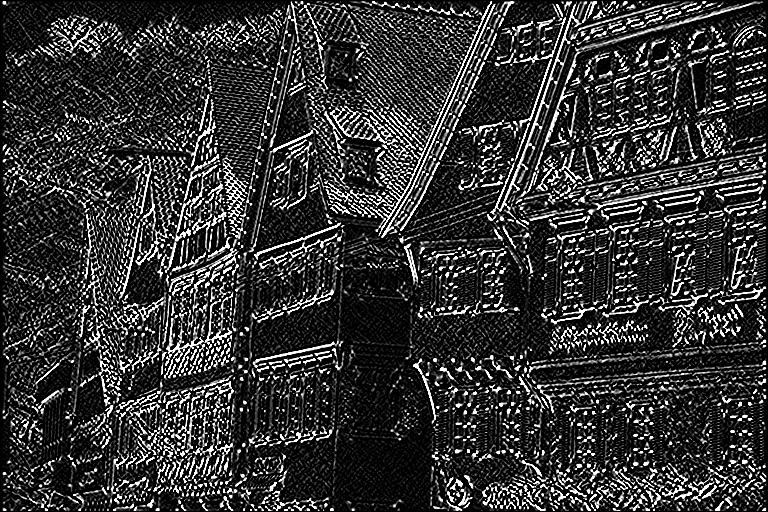

In [ ]:
cv2_imshow(img1_sobel)

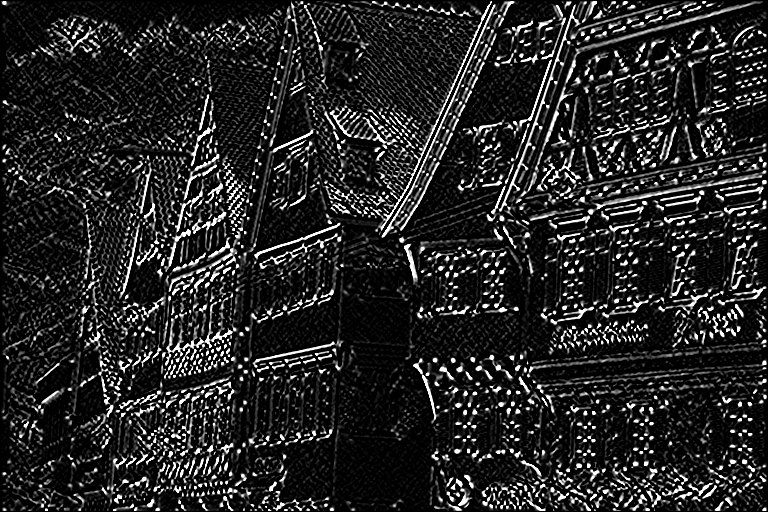

In [ ]:
cv2_imshow(img2_sobel)

Based on the concept and computation of how the convolution is performed, we can see edges or boundaries are addressed because the filtered images display the largest changes in the intensity of the original image.

#### Canny edge detector

The Canny edge detector also uses the Sobel kernels for computations. Initially, an image is filtered or computed with the Sobel kernels in both the x and y directions to compute the image gradients first. Next, the magnitude of image gradients or edge gradients is calculated by summing the square of the image gradients in both directions and then taking a square root. We also obtain the edge direction by the inverse trigonometric of the division of the image gradients in the y-direction and image gradients in the x-direction. Note that the gradient direction is always perpendicular to the edges.

Once obtaining the edge gradient and edge direction for each pixel, we set up two thresholds, which are minVal and maxVal. Any edges with a gradient magnitude higher than maxVal are edges, and those lower than minVal are non-edges. Non-edges are discarded. Those pixels between the two thresholds are classified as edges or non-edges based on their connectivity. If they are connected to "edge" pixels, they are considered to be part of the edges. Otherwise, they are also discarded.

In terms of the *Canny()* function, the arguments are (1) input image, (2) *minVal* (threshold), and (3) *maxVal* (threshold). Here, we set *minVal=100* and *maxVal=200*.

In [ ]:
img1_cany = cv2.Canny(img1,100,200)
img2_cany = cv2.Canny(img2,100,200)

The resulting images are shown in the following.

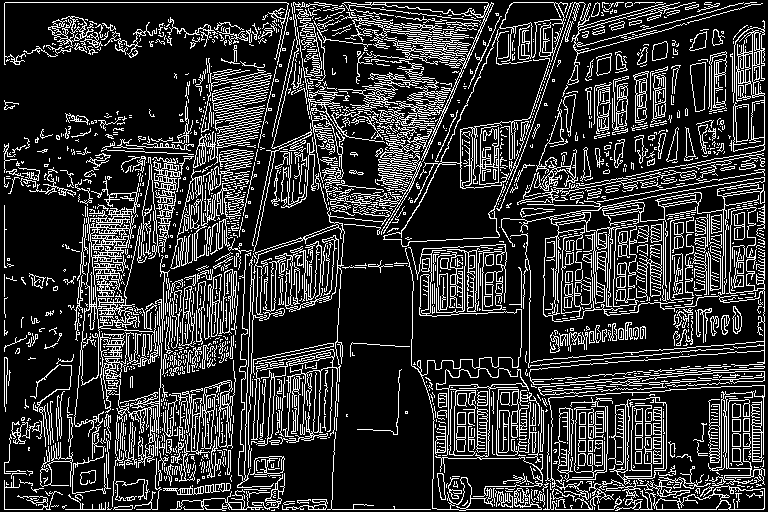

In [ ]:
cv2_imshow(img1_cany)

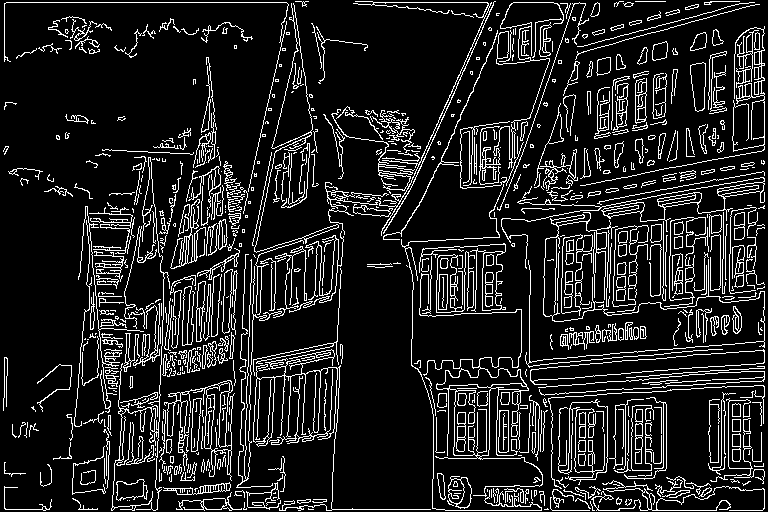

In [ ]:
cv2_imshow(img2_cany)

The Canny edge detector returns results that are less noisy and much smooth than the Sobel edge detector due to the implementation of thresholding (*minVal* and *maxVal*).

### Display resulting images

Now we have results from image thresholding, the Sobel edge detector, and the Canny edge detector.
Besides using the *imshow()* function in the cv2 or google.colab modules to display images, we can also use the *imshow()* function in the matplotlib (plt) module regardless of displaying images in whichever environment.


Here is an example using the original image after the Sobel filters.

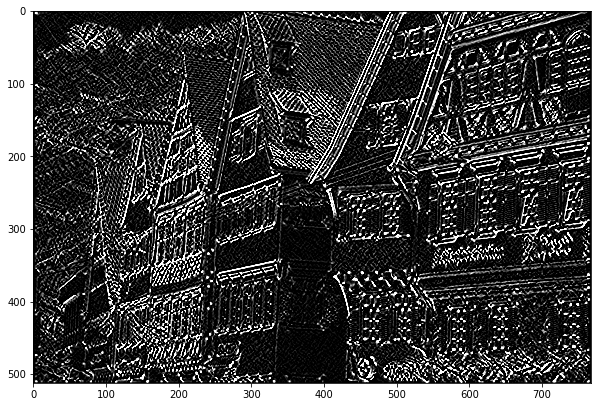

In [ ]:
plt.imshow(img1_sobel, cmap='gray', vmin=0, vmax=255)
plt.show()

We can remove ticks on the x and y axes using the *xticks()* and *yticks()* functions.

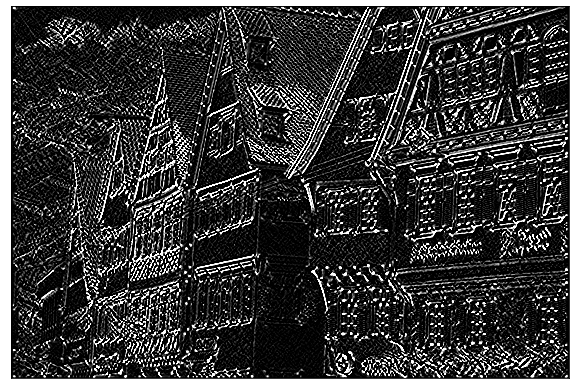

In [ ]:
plt.imshow(img1_sobel, cmap='gray', vmin=0, vmax=255)
plt.xticks([]),plt.yticks([])
plt.show()

#### Plot images side-by-side for comparisons

The functions used below are from the matplotlib (pyplot) module, which we have already imported in the beginning.

Regarding side-by-side comparisons, we can create a plot that includes all images we want to display simultaneously. Note that some extra modifications are required if showing more pictures or users wish to have different layouts. Here we have an example of showing two images side-by-side per row. The first row displays the original image and the original image after image thresholding. The second row displays the original image after the Sobel and Canny edge detectors.

First, let's name the title of each image and create an array to store each image based on the order mentioned above.

In [ ]:
titles = ['Original Image', 'Image Thresholding','Sobel', 'Canny']
imgs = [img1,img1_thre,img1_sobel,img1_cany]

Secondly, we can write a loop to display each image. Before the loop, we specify the size of a plot (which will include several subplots later) using rcParams['figure.figsize']=[10,8].
In the loop, the first line indicates how many iterations, which is 4 due to 4 subplots that we will display.

In the second line of the loop, the *subplot(nrows,ncols,index)* function requires the number of rows (which is 2), the number of columns (which is also 2), and the index or plot number used to identify the particular subplot in the grid (increment across rows first and has a maximum of nrows * ncols.

In the third line of the loop, the *imshow()* function is used and requires an input image as the first argument. The second argument we set up here is *cmap*, which is a color map used to map colors. The third and fourth arguments, *vmin* and *vmax*, define the data range that the colormap covers. You can see a difference in color if plotting images after the Sobel filters without setting *vmin* and *vmax*.

In the fourth line of the loop, the *title()* function is used to display the title of each subplot based on the names stored in the array we created earlier.

In the fifth line of the loop, the *xticks()* and *yticks()* functions are used to customize labels and tick locations in the x and y axes. Because we are plotting images, we don't need to label the x and y axes, as well as ticks.

Outside the loop, the *subplots_adjust()* function can help adjust white space between two subplots using the *wspace* argument. The *tight_layout()* function adjusts the padding between and around subplots. Lastly, the *show()* function displays all subplots.





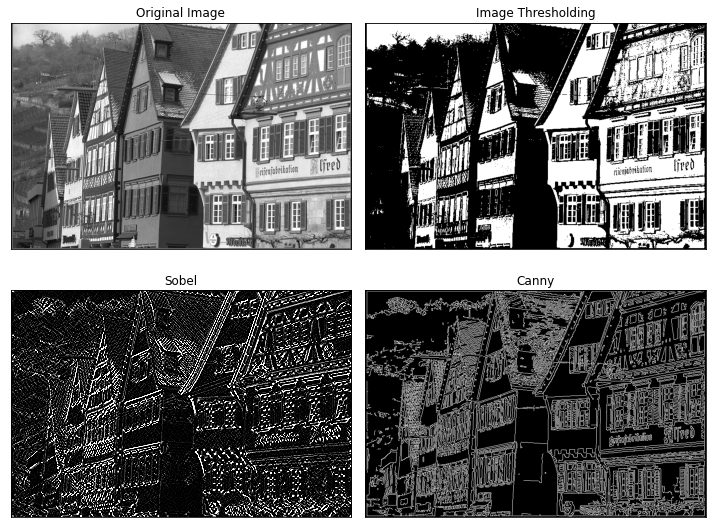

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs[i],cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
titles2 = ['Original Blurry Image', 'Image Thresholding','Sobel', 'Canny']
imgs2 = [img2,img2_thre,img2_sobel,img2_cany]

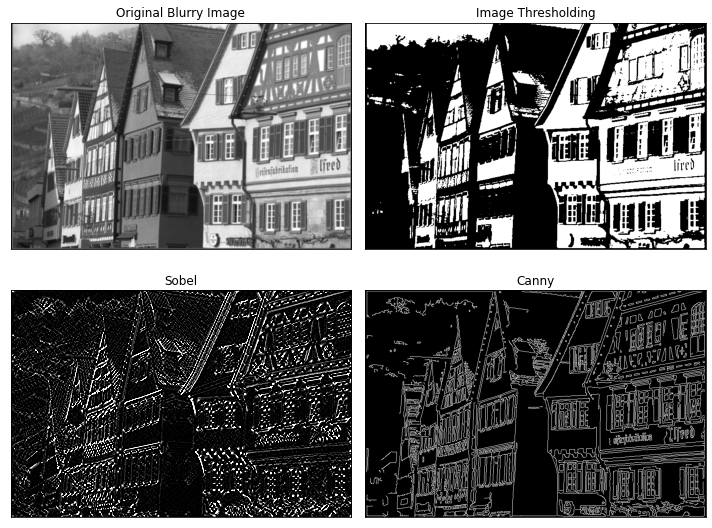

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs2[i],cmap='gray', vmin=0, vmax=255)
    plt.title(titles2[i])
    plt.xticks([]),plt.yticks([])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

We can also make side-by-side comparisons between the original and original blurry images (in the first row), two images after thresholding (in the second row), two images after the Sobel filters (in the third row), and two images after the Canny filters (in the fourth row). This is left for practice.

### Write resulting images

There are three resulting images from image processing: images after applying thresholding, Sobel edge detector, and Canny edge detector. Each of images will be stored with a specified name based on whichever technique is used.

#### Setting filepath(s) to save images

Ideally, we don't want the resulting images stored in the same path as the original images. Therefore, in this step, we create a new folder and then pass the path of the new folder to use later. To do so, we give a path where we want to create a new folder first.

In [ ]:
storepath = "/content/drive/MyDrive/LIVE/"

We can create a new folder under the *storepath* location in several ways. Here, we use the *mkdir()* function to create a new folder "result".

In [ ]:
os.mkdir(storepath + 'result')

#### Write images with the specific names and format

Since we have three different resulting images, we want to specify filenames based on the techniques.

To do so, we modify the original filename using the *replace()* function (trim or remove unnecessary or unwanted words). Specifically, we pass the words that we want to remove from the original files (which are ".bmp") in the first argument and pass ''" (we want to remove unwanted characters) to the second argument in the *replace()* function.

Next, we write a loop to add "_threshold.bmp" for the image after thresholding, "_sobel.bmp" for the image after the Sobel edge detector, "_canny.bmp" for the image after the Canny edge detector. We also add the path where we want to store images at the beginning of the filenames.

In [ ]:
for i in range(len(filename1)):
  thres_name = storepath + "result/" + str(filename1[i].replace('.bmp','')) + "_threshold.bmp"
  sobel_name = storepath + "result/" +str(filename1[i].replace('.bmp','')) + "_sobel.bmp"
  canny_name = storepath + "result/" + str(filename1[i].replace('.bmp','')) + "_canny.bmp"
  print(thres_name)
  print(sobel_name)
  print(canny_name)


/content/drive/MyDrive/LIVE/result/buildings_threshold.bmp
/content/drive/MyDrive/LIVE/result/buildings_sobel.bmp
/content/drive/MyDrive/LIVE/result/buildings_canny.bmp


Next, we add the *imwrite()* function in the above loop to write the resulting images from the original images. Note that we've already created an array to store images we created when plotting them.

In [ ]:
for i in range(len(filename1)):
  thres_name = storepath + "result/" + str(filename1[i].replace('.bmp','')) + "_threshold.bmp"
  sobel_name = storepath + "result/" +str(filename1[i].replace('.bmp','')) + "_sobel.bmp"
  canny_name = storepath + "result/" + str(filename1[i].replace('.bmp','')) + "_canny.bmp"
  cv2.imwrite(thres_name, imgs[i+1])
  cv2.imwrite(sobel_name, imgs[i+2])
  cv2.imwrite(canny_name, imgs[i+3])

We repeat the same process for the blurry image.

In [ ]:
for i in range(len(filename2)):
  thres_name = storepath + "result/" + str(filename2[i].replace('.bmp','')) + "_threshold.bmp"
  sobel_name = storepath + "result/" +str(filename2[i].replace('.bmp','')) + "_sobel.bmp"
  canny_name = storepath + "result/" + str(filename2[i].replace('.bmp','')) + "_canny.bmp"
  cv2.imwrite(thres_name, imgs2[i+1])
  cv2.imwrite(sobel_name, imgs2[i+2])
  cv2.imwrite(canny_name, imgs2[i+3])

This is the end of the module. Thank you :)



# References

1.   https://live.ece.utexas.edu/research/quality/subjective.htm
2.   https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
3.   https://numpy.org/doc/stable/
4.   https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
5.   https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
6.   https://learnopencv.com/edge-detection-using-opencv/
7.   https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
8.   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
